
## Observations and Insights 

1. Capomulin and Ramicane present the best alternative for cancer treatment.
2. Both were studied in similar way for  Males and Females, both shows better survival rates than other drugs.
3. Camopulin presents better rate of tumor size reduction and also a smother behavior, always in decline, Ramicane takes more time to start showing results in tumor reduction.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, with a inner join I can get commun items to the data
moustudy_df=pd.merge(study_results, mouse_metadata, how ="left", on="Mouse ID")

# Display the data table for preview
moustudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
moustudy_df.dtypes # checking for data type

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [3]:
moustudy_df.count() # cheking for incomplete rows and finding number of mice

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
mousecnt = len(moustudy_df["Mouse ID"].unique())     # saving variable for later use
mousecnt

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duprows=moustudy_df[moustudy_df.duplicated(["Mouse ID", "Timepoint"] )]
duprows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duprows2 = moustudy_df.loc[moustudy_df["Mouse ID"]== "g989"]   # getting Data for g989
duprows2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

moustudycln_df = moustudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])   # Droping Duplicated row
moustudycln_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
moustudycln_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

In [9]:
mousecln = len(moustudycln_df["Mouse ID"].unique()) # Checking the duplicate, it didn't work
mousecln                                            # g989 is listed under 2 different drugs
                                                    # this is not going to affect the study since
                                                    # Propriva is not one of the drugs part of this analysis

249

In [10]:
duprows3=moustudy_df[moustudy_df.duplicated(["Mouse ID", "Timepoint"] )]
duprows3

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
moustudycln_df.dtypes                                  # Checking Data Types

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Mean= moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()      #mean of Tumor Volume by Drug Regimen
Median= moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()  #median of Tumor Volume by Drug Regimen
Var= moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()        #Variance of Tumor Volume by Drug Regimen
Std_Dev= moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()    #Standard Deviation of Tumor Volume by Drug Regimen
Sem= moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()        #Standard error of the mean of Tumor Volume by Drug Regimen

# Assemble the resulting series into a single summary dataframe.
sumstats1_df=pd.DataFrame({"Mean Tumor Volume":Mean, "Median Tumor Volume":Median, "Tumor Volume Variance":Var, "Tumor Volume Std Dev":Std_Dev, "Tumor Volume Std Err": Sem})
sumstats1_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

sumstats2_df = moustudycln_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
sumstats2_df = sumstats2_df.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume","var":" Tumor Volume Variance","std":"Tumor Volume Std Dev","sem":"Tumor Volume Std Err."})
    
sumstats2_df                                               # for the second method using .agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

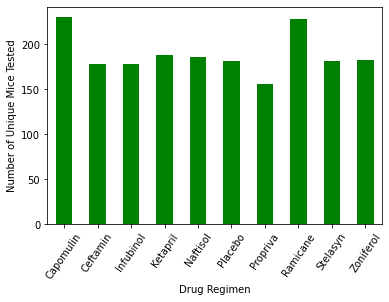

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Totalmicedf=moustudycln_df.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar',rot=55, color= 'g')
plt.ylabel('Number of Unique Mice Tested')

plt.show()

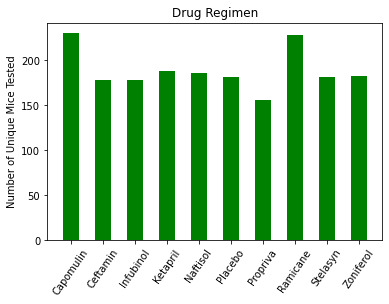

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

Dlist=sumstats2_df.index.tolist()
DCount_df= moustudycln_df.groupby(["Drug Regimen"]).count()
DCount=DCount_df["Mouse ID"].values
DCount
fig, ax = plt.subplots()                                    #label  Y axis
ax.set_ylabel('Number of Unique Mice Tested')               #Label  X axis
ax.set_title('Drug Regimen')                                #Creating Graphic dor Dlist vs. Dcount
plt.bar(Dlist, DCount, color ='g',width=0.5)
plt.savefig('barras_simple.png')
plt.xticks(Dlist, rotation= 55)
plt.show()


,allmice,ByPercent
Sex,,
Female,124,49.799197
Male,125,50.200803


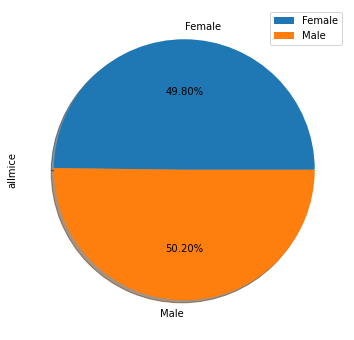

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

GCount=moustudycln_df.groupby(["Mouse ID", "Sex"])
GCount_df=pd.DataFrame(GCount.size())                                 # I need the number of elements
MCount=pd.DataFrame(GCount_df.groupby(["Sex"]).count())               # Dataframe for Sex, Female-Male
MCount.columns=["allmice"]                                            # Rename DataFrame to allmice
MCount["ByPercent"]=((MCount["allmice"]/MCount["allmice"].sum())*100) # Getting the %
plot= MCount.plot.pie(y='allmice', shadow=True, figsize=(6,6), autopct= "%1.2f%%")
MCount





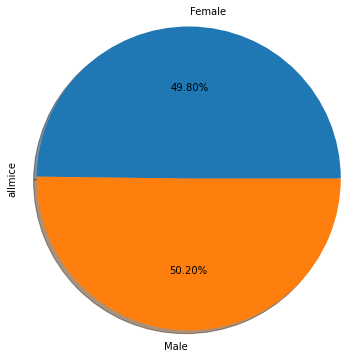

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# From allmice ByPercent grab sizes

size=[49.799197,50.200803]                              # values for size
explode =(0,0.1)                                        # enhance visualization
labels=["Female","Male"]                                # labels

fig, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(size, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=0)
ax1.axis('equal')                                          # to ensure that pie is a circle.
plt.ylabel("allmice")
plt.show()



## Quartiles, Outliers and Boxplots

In [19]:

#moustudy_df.head(20)
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

Druglist=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
BestReg=moustudycln_df[moustudycln_df["Drug Regimen"].isin(Druglist)]
BestReg=BestReg.sort_values(["Timepoint"], ascending=True)
BestReg

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
221,q483,0,45.000000,0,Ceftamin,Male,6,26
220,o287,0,45.000000,0,Ceftamin,Male,2,28
219,b487,0,45.000000,0,Ceftamin,Female,6,28
218,p438,0,45.000000,0,Ceftamin,Female,11,26
...,...,...,...,...,...,...,...,...
1802,e476,45,62.435404,1,Infubinol,Male,23,26
1804,a203,45,67.973419,2,Infubinol,Female,20,23
1806,f345,45,60.918767,1,Infubinol,Male,23,26
1810,l471,45,67.748662,1,Ceftamin,Female,7,28


In [20]:
# Start by getting the last (greatest) timepoint for each mouse
Maxtum = moustudycln_df.groupby(["Mouse ID"])['Timepoint'].max()
Maxtum = Maxtum.reset_index()
Maxtum

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [21]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
DataMerg=BestReg.merge(Maxtum, on=['Mouse ID', 'Timepoint'], how="right")
DataMerg.head(50)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,x226,0,45.000000,0.0,Ceftamin,Male,23.0,28.0
1,b447,0,45.000000,0.0,Ceftamin,Male,2.0,30.0
2,u153,0,45.000000,0.0,Ceftamin,Female,11.0,25.0
3,t573,0,45.000000,0.0,Ceftamin,Female,15.0,27.0
4,w678,5,43.166373,0.0,Ramicane,Female,5.0,24.0
5,v339,5,46.250112,0.0,Infubinol,Male,20.0,26.0
6,c326,5,36.321346,0.0,Infubinol,Female,18.0,25.0
7,o813,5,45.699331,0.0,Infubinol,Male,24.0,28.0
8,h531,5,47.784682,0.0,Ceftamin,Male,5.0,27.0
9,m756,5,47.010364,1.0,Infubinol,Male,19.0,30.0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumVol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in druglist:
    TumorVol= DataMerg.loc[DataMerg["Drug Regimen"] == drug, 'Tumor Volume (mm3)']    # Locate the rows which contain mice on each drug and get the tumor volumes
    TumVol.append(TumorVol)                                                           # add subset 
    quartiles = TumorVol.quantile([.25,.5,.75])                                       # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25] 
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = TumorVol.loc[(TumorVol < lower_bound) | (TumorVol > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 6    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


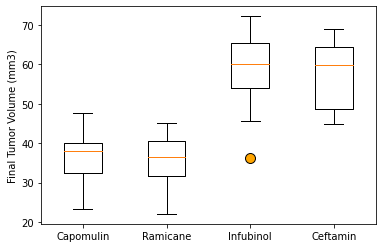

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
FinTuVol = dict(markerfacecolor='orange',markersize=10)
plt.boxplot(TumVol, labels = Druglist, flierprops=FinTuVol)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

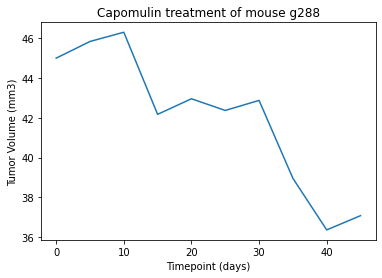

In [33]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

CapomulinTable = moustudycln_df.loc[moustudycln_df['Drug Regimen'] == "Capomulin"]
MouseData = CapomulinTable.loc[CapomulinTable['Mouse ID']== "g288"]
plt.plot(MouseData['Timepoint'],MouseData['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse g288')
plt.show()

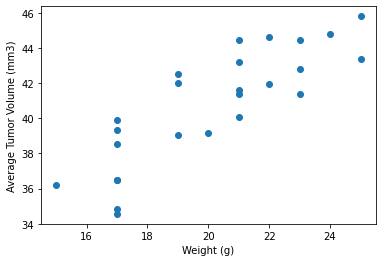

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
CapomulinTable = moustudy_df.loc[moustudy_df['Drug Regimen'] == "Capomulin"]
CapomulinAvg = CapomulinTable.groupby(['Mouse ID']).mean()
plt.scatter(CapomulinAvg['Weight (g)'],CapomulinAvg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


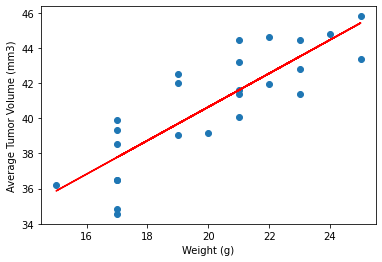

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(CapomulinAvg['Weight (g)'],CapomulinAvg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(CapomulinAvg['Weight (g)'],CapomulinAvg['Tumor Volume (mm3)'])

y_values = CapomulinAvg['Weight (g)']*model[0]+model[1]
plt.scatter(CapomulinAvg['Weight (g)'],CapomulinAvg['Tumor Volume (mm3)'])
plt.plot(CapomulinAvg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()